<a href="https://colab.research.google.com/github/SouzaaCarol/Estudos-Python/blob/main/TITANIC_Unicid_2025_S2_Noite_QUINTA_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

sns.set_style('whitegrid')
plt.rcParams ['figure.figsize'] = (12, 7)

print("Bibliotecas Importadas com Sucesso!")

# Carregando o DataSet do Titanic

df = sns.load_dataset('titanic')

print("DataSet do Titanic Carregado!")

print(f"Nossa lista de passageiros contém {df.shape[0]} registros e {df.shape[1]} informações sobre cada um.")

df.head()


Bibliotecas Importadas com Sucesso!
DataSet do Titanic Carregado!
Nossa lista de passageiros contém 891 registros e 15 informações sobre cada um.


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [4]:
fig = px.pie(df, names='survived', title = 'Distribuição dos Sobreviventes no Titanic',
             labels={0: 'Não Sobreviveu', 1:'Sobreviveu'},
             color_discrete_sequence=px.colors.sequential.Agsunset)

fig.update_traces(textinfo='percent+label', pull=[0, 0.1])
fig.show()

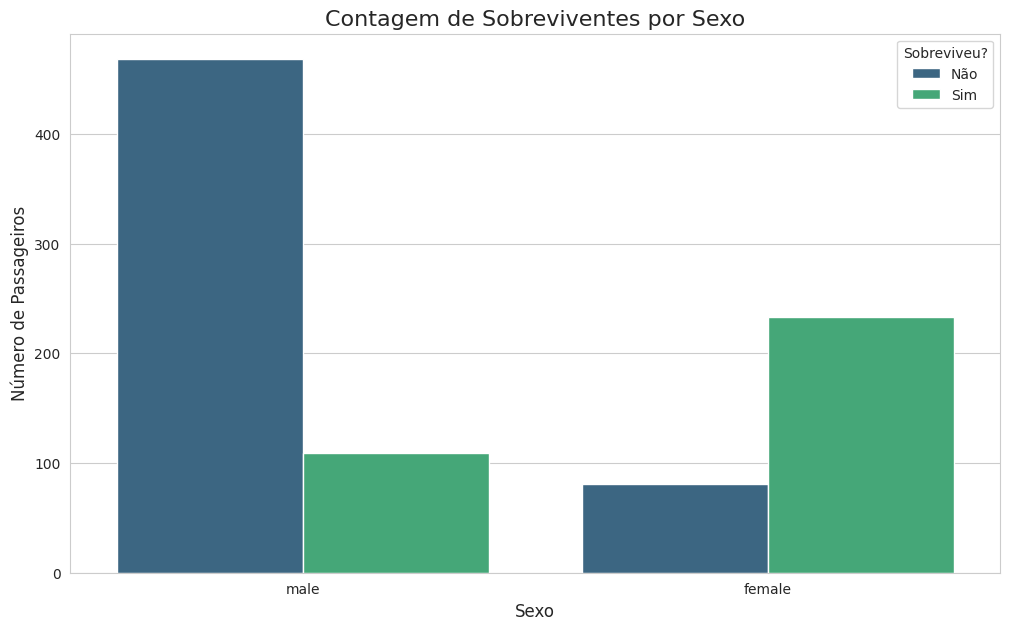

In [5]:
sns.countplot(x='sex', hue='survived',  data = df, palette='viridis')
plt.title('Contagem de Sobreviventes por Sexo', fontsize=16)
plt.xlabel('Sexo', fontsize=12)
plt.ylabel('Número de Passageiros', fontsize=12)
plt.legend(title='Sobreviveu?', labels=['Não', 'Sim'])
plt.show()

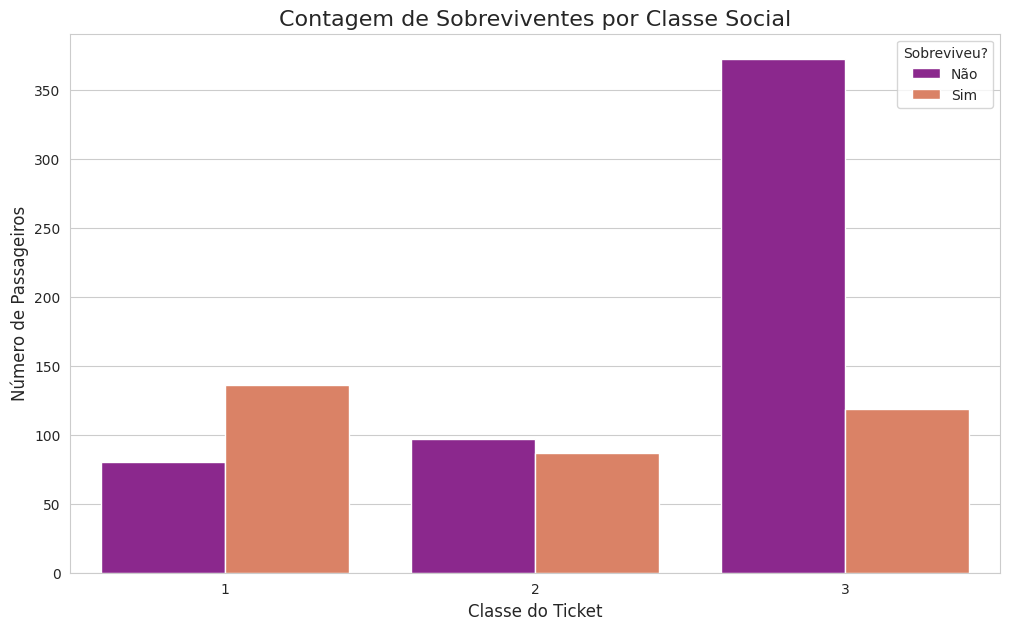

In [6]:
sns.countplot(x='pclass', hue='survived', data=df, palette='plasma')
plt.title('Contagem de Sobreviventes por Classe Social', fontsize=16)
plt.xlabel('Classe do Ticket', fontsize=12)
plt.ylabel('Número de Passageiros', fontsize=12)
plt.legend(title = 'Sobreviveu?', labels=['Não', 'Sim'])
plt.show()

In [7]:
import pandas as pd
import seaborn as sns

# Recarregar os Dados
df_original = sns.load_dataset('titanic')
df = df_original.copy()

# Engenharia de Atributos
df['family_size'] = df['sibsp'] + df['parch'] + 1

df['is_alone'] = (df['family_size'] == 1).astype(int)

# Removendo Ruídos

df.drop(['alive', 'who', 'adult_male', 'class', 'alone', 'sibsp', 'parch', 'deck'], axis=1, inplace=True)

print("Preparação Mínima Consluída. Dados prontos para o Pipeline.")

df.head()

Preparação Mínima Consluída. Dados prontos para o Pipeline.


,survived,pclass,sex,age,fare,embarked,embark_town,family_size,is_alone
0,0,3,male,22.0,7.2500,S,Southampton,2,0
1,1,1,female,38.0,71.2833,C,Cherbourg,2,0
2,1,3,female,26.0,7.9250,S,Southampton,1,1
3,1,1,female,35.0,53.1000,S,Southampton,2,0
4,0,3,male,35.0,8.0500,S,Southampton,1,1


In [8]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder


X = df.drop('survived', axis=1)
y = df['survived']


numeric_features = ['age', 'fare', 'pclass', 'family_size', 'is_alone']
categorical_features = ['sex', 'embark_town']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

from sklearn.ensemble import RandomForestClassifier

model = Pipeline(steps=[
    ('preprocessamento', preprocessor),
    ('classificador', RandomForestClassifier(n_estimators=200, random_state=42))
])

print("Pipeline Criado com Sucesso!")


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

print("Dados de treino e teste separados!")

# Treinando o Modelo

model.fit(X_train, y_train)

print("Modelo Treinado com Sucesso!")

# Avaliando o Modelo

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = model.predict(X_test)

print("\nAcurácia do Modelo:")
print(accuracy_score(y_test, y_pred))

print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))

print("\nMatriz de Confusão:")
print(confusion_matrix(y_test, y_pred))


# Testando a IA
passageiro_novo = pd.DataFrame({
    'pclass': [3],
    'sex': ['female'],
    'age': [20],
    'fare': [7.25],
    'embark_town': ['Southampton'],
    'family_size': [1],
    'is_alone': [1]
})

print("\nResultado para passageiro fictício:")
resultado = model.predict(passageiro_novo)[0]

print("Sobreviveu" if resultado == 1 else "Não sobreviveu")





Pipeline Criado com Sucesso!
Dados de treino e teste separados!
Modelo Treinado com Sucesso!

Acurácia do Modelo:
0.8116591928251121

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.85      0.84      0.84       134
           1       0.76      0.78      0.77        89

    accuracy                           0.81       223
   macro avg       0.80      0.81      0.80       223
weighted avg       0.81      0.81      0.81       223


Matriz de Confusão:
[[112  22]
 [ 20  69]]

Resultado para passageiro fictício:
Sobreviveu


In [9]:
def prever_sobrevivencia(modelo, pclass, sexo, idade, tarifa, cidade, family_size):
    # Transformando os dados textuais para padrões do modelo
    is_alone = 1 if family_size == 1 else 0

    entrada = pd.DataFrame({
        'pclass': [pclass],
        'sex': [sexo],
        'age': [idade],
        'fare': [tarifa],
        'embark_town': [cidade],
        'family_size': [family_size],
        'is_alone': [is_alone]
    })

    resultado = modelo.predict(entrada)[0]

    if resultado == 1:
        return "✨ Sim, essa pessoa provavelmente sobreviveria!"
    else:
        return "💀 Não, essa pessoa provavelmente não sobreviveria."


In [10]:
def perguntar(modelo, texto):
    texto = texto.lower()

    # Classe social
    if "primeira" in texto or "1" in texto:
        pclass = 1
    elif "segunda" in texto or "2" in texto:
        pclass = 2
    else:
        pclass = 3

    # Sexo
    sexo = "female" if "mulher" in texto or "feminino" in texto else "male"

    # Idade
    import re
    idade = int(re.findall(r'\d+', texto)[0])

    # Tarifa
    tarifas = re.findall(r'\d+', texto)
    tarifa = float(tarifas[-1])

    # Cidade do embarque
    if "southampton" in texto:
        cidade = "Southampton"
    elif "cherbourg" in texto:
        cidade = "Cherbourg"
    else:
        cidade = "Queenstown"

    # Família
    family_size = 1 if "sozinha" in texto or "sozinho" in texto else 2

    # Reuso da função
    return prever_sobrevivencia(modelo, pclass, sexo, idade, tarifa, cidade, family_size)


In [11]:
prever_sobrevivencia(
    model,
    pclass=3,
    sexo='female',
    idade=25,
    tarifa=15.0,
    cidade='Southampton',
    family_size=1
)


'💀 Não, essa pessoa provavelmente não sobreviveria.'

In [12]:
perguntar(
    model,
    "Mulher de 22 anos, sozinha, terceira classe, pagou 10, embarcou em Southampton"
)


'✨ Sim, essa pessoa provavelmente sobreviveria!'

In [13]:
perguntar(
    model,
    "Homem de 40 anos, com família, segunda classe, pagou 30, embarcou em Cherbourg"
)


'💀 Não, essa pessoa provavelmente não sobreviveria.'

In [14]:
print(perguntar(model, "Mulher, 19 anos, sozinha, pagou 8, terceira classe, embarcou em Queenstown"))
print(perguntar(model, "Homem, 45 anos, com esposa, pagou 75, primeira classe, embarcou em Cherbourg"))
print(perguntar(model, "Homem, 30 anos, sozinho, pagou 20, segunda classe, embarcou em Southampton"))


✨ Sim, essa pessoa provavelmente sobreviveria!
✨ Sim, essa pessoa provavelmente sobreviveria!
💀 Não, essa pessoa provavelmente não sobreviveria.
